- 결측치, 라벨인코더 0값과 겹친다.

# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [73]:
import pandas as pd
pd.set_option('display.max_seq_items', 40)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### 데이터 셋 읽어오기

In [74]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [75]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,NaN,purchasing,62,Quotation or purchase consultation,multi-split,NaN,NaN,/Quezon City/Philippines,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,NaN,media and communication,96,Quotation or purchase consultation,multi-split,NaN,NaN,/PH-00/Philippines,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,NaN,engineering,56,Product Information,single-split,NaN,NaN,/Kolkata /India,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,44,Quotation or purchase consultation,vrf,NaN,NaN,/Bhubaneswar/India,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,consulting,97,Quotation or purchase consultation,multi-split,NaN,NaN,/Hyderabad/India,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [77]:
df_train.isna().sum()

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area              40882
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64

In [78]:
df_test.head()

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,/ / Brazil,ID,0.073248,47466,End Customer,Enterprise,53.0,NaN,NaN,NaN,consulting,3,NaN,NaN,NaN,NaN,/ / Brazil,none,LGESP,NaN,1,0,0.001183,0.049840,retail,Electronics & Telco,278,True
1,9738,0.25,400 N State Of Franklin Rd Cloud IT / Johnson...,IT,NaN,5405,End Customer,SMB,NaN,NaN,NaN,NaN,NaN,23,Quotation or Purchase Consultation,NaN,NaN,NaN,400 N State Of Franklin Rd Cloud IT / Johnson...,none,LGEUS,NaN,0,0,0.000013,NaN,transportation,Others,437,True
2,8491,1.00,/ / U.A.E,ID,NaN,13597,Specifier/ Influencer,SMB,NaN,NaN,NaN,NaN,information technology,138,Quotation or Purchase Consultation,hospital tv,UT662M Series,50UT662M (MEA),/ / U.A.E,manager,LGEGF,less than 3 months,0,0,0.000060,0.131148,hospital & health care,General Hospital,874,True
3,19895,0.50,/ Madison / United States,ID,0.118644,17204,NaN,Enterprise,NaN,NaN,NaN,NaN,sales,3,Quotation or Purchase Consultation,NaN,Digital Signage or Commercial TVs,NaN,/ Madison / United States,none,LGEUS,more than a year,0,0,0.001183,0.049840,retail,NaN,194,False
4,10465,1.00,/ Sao Paulo / Brazil,ID,0.074949,2329,End Customer,Enterprise,2.0,1.0,NaN,1.0,engineering,107,Quotation or Purchase Consultation,led signage,LG LED Bloc,LSAA012,/ Sao Paulo / Brazil,others,LGESP,less than 3 months,1,1,0.003079,0.064566,corporate / office,Engineering,167,True


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [80]:
df_test['is_converted'].value_counts()

is_converted
False    3383
True     1888
Name: count, dtype: int64

In [81]:
print('False : ', 3331/5271*100)
print('True : ', 1940/5271*100)

False :  63.19483968886359
True :  36.80516031113641


In [82]:
df_train['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

In [83]:
print('False : ', 54449/59299*100)
print('True : ', 4850/59299*100)

False :  91.82110996812763
True :  8.178890031872376


### 수치형, 범주형 데이터 나눠서 살펴보기

In [84]:
cols = df_train.columns
numcols = list(df_train._get_numeric_data().columns) # target이 포함되어 있음
target = 'is_converted'
catcols = list(set(cols)-set(numcols))
numcols.remove(target)
display(numcols, catcols)

['bant_submit',
 'com_reg_ver_win_rate',
 'customer_idx',
 'historical_existing_cnt',
 'id_strategic_ver',
 'it_strategic_ver',
 'idit_strategic_ver',
 'lead_desc_length',
 'ver_cus',
 'ver_pro',
 'ver_win_rate_x',
 'ver_win_ratio_per_bu',
 'lead_owner']

['customer_country',
 'customer_position',
 'response_corporate',
 'product_subcategory',
 'business_area',
 'business_unit',
 'customer_type',
 'enterprise',
 'product_category',
 'customer_job',
 'inquiry_type',
 'customer_country.1',
 'product_modelname',
 'business_subarea',
 'expected_timeline']

In [85]:
for column in numcols:
    print(column)
    print()
    print(df_train[column].unique())
    print()

bant_submit

[1.   0.75 0.5  0.25 0.  ]

com_reg_ver_win_rate

[0.06666667 0.08888889 0.04081633 0.00393701        nan 0.05753425
 0.075      0.04464286 0.08433735 0.0199005  0.07494867 0.04347826
 0.03119584 0.14705882 0.03305785 0.08069164 0.33333333 0.04310345
 0.11627907 0.01351351 0.04854369 0.01818182 0.01185771 0.21428571
 0.3902439  0.03225806 0.01754386 0.03278689 0.05555556 0.01515152
 0.46153846 0.06818182 0.08333333 0.26923077 0.18181818 0.23076923
 0.64285714 0.16666667 0.01724138 0.05389222 0.04968944 0.01098901
 0.06779661 0.03703704 0.00378788 0.36363636 0.10526316 0.61538462
 0.08695652 0.05442177 0.05319149 0.07142857 0.04       0.04166667
 0.02892562 0.11842105 0.04918033 0.11864407 0.07324841 0.02898551
 0.01960784 0.02272727 0.004      0.125      0.01694915 0.12412178
 0.13636364 0.02020202 0.11363636 0.03603604 0.06956522 0.5
 1.         0.25       0.44444444 0.025      0.83333333 0.04761905
 0.4        0.04225352 0.2       ]

customer_idx

[32160 23122  1755 ... 

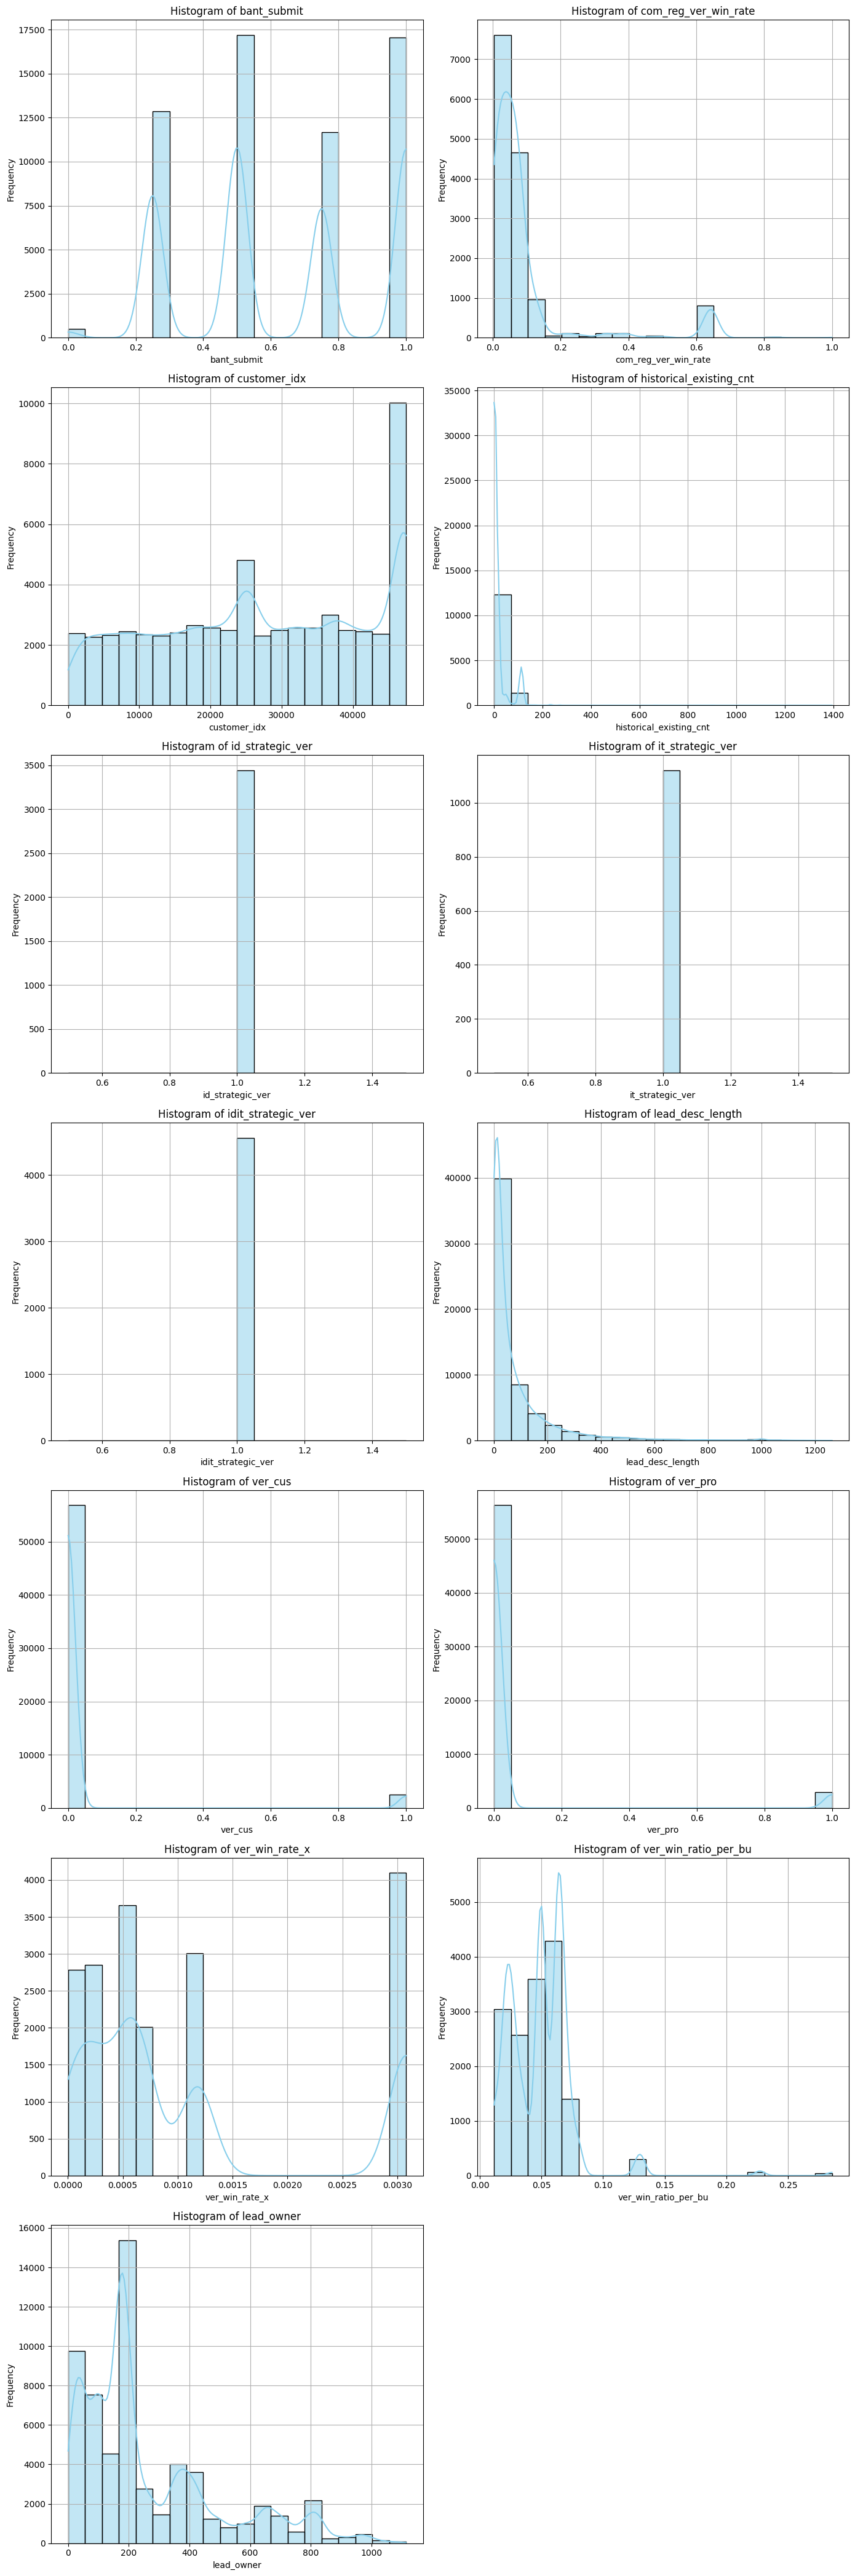

In [86]:
def plot_histograms(df, numcols):
    num_plots = len(numcols)
    num_rows = num_plots // 2 + num_plots % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 6 * num_rows))

    for i, col in enumerate(numcols):
        row = i // 2
        col = i % 2
        sns.histplot(df[numcols[i]], bins=20, kde=True, color='skyblue', ax=axes[row][col])
        axes[row][col].set_title(f'Histogram of {numcols[i]}')
        axes[row][col].set_xlabel(numcols[i])
        axes[row][col].set_ylabel('Frequency')
        axes[row][col].grid(True)
    
    # Hide unused subplots
    for j in range(i+1, num_rows*2):
        fig.delaxes(axes[j // 2][j % 2])

    plt.tight_layout()
    plt.show()
        
plot_histograms(df_train, numcols)

In [87]:
# df_train['product_category'].value_counts(dropna = False)[:20]

In [88]:
#df_test['product_category'].value_counts(dropna = False)

In [89]:
#df_test[df_test['is_converted'] ==  True]['customer_position'].value_counts(dropna = False)

In [90]:
#df_train[df_train['is_converted'] ==  True]['customer_position'].value_counts(dropna = False)

In [91]:
df_train = df_train.drop(["customer_country",
                          "customer_country.1",
                          'business_subarea',
                          'product_subcategory',
                          'product_modelname',
                          'id_strategic_ver',
 'it_strategic_ver',
 'idit_strategic_ver',
                         ], axis=1)

df_test = df_test.drop(["customer_country",
                        "customer_country.1",
                        'business_subarea',
                        'product_subcategory',
                        'product_modelname',
                        'id_strategic_ver',
 'it_strategic_ver',
 'idit_strategic_ver',
                         ], axis=1)

In [92]:
cols = df_train.columns
numcols = list(df_train._get_numeric_data().columns) # target이 포함되어 있음
target = 'is_converted'
catcols = list(set(cols)-set(numcols))
numcols.remove(target)
display(numcols, catcols)

['bant_submit',
 'com_reg_ver_win_rate',
 'customer_idx',
 'historical_existing_cnt',
 'lead_desc_length',
 'ver_cus',
 'ver_pro',
 'ver_win_rate_x',
 'ver_win_ratio_per_bu',
 'lead_owner']

['response_corporate',
 'customer_position',
 'business_area',
 'business_unit',
 'customer_type',
 'enterprise',
 'product_category',
 'inquiry_type',
 'customer_job',
 'expected_timeline']

## 2. 데이터 전처리

### 수치형 데이터 nan값 처리

In [93]:
df_train[numcols].isna().sum()

bant_submit                    0
com_reg_ver_win_rate       44731
customer_idx                   0
historical_existing_cnt    45543
lead_desc_length               0
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
lead_owner                     0
dtype: int64

In [94]:
df_train[numcols] = df_train[numcols].fillna(0)
df_train[numcols].isna().sum()

bant_submit                0
com_reg_ver_win_rate       0
customer_idx               0
historical_existing_cnt    0
lead_desc_length           0
ver_cus                    0
ver_pro                    0
ver_win_rate_x             0
ver_win_ratio_per_bu       0
lead_owner                 0
dtype: int64

In [95]:
# 테스트 데이터도 동일하게 처리해주기
df_test[numcols] = df_test[numcols].fillna(0)

### expected_timeline

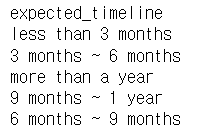
위와 같이 총 5개로 범주화

In [96]:
df_train[['expected_timeline']]

,expected_timeline
0,less than 3 months
1,less than 3 months
2,less than 3 months
3,less than 3 months
4,less than 3 months
...,...
59294,3 months ~ 6 months
59295,9 months ~ 1 year
59296,less than 3 months
59297,more than a year


In [97]:
#null_indexes = df_train[df_train['expected_timeline'].isna()].index
#print(null_indexes)
#df_train.iloc[null_indexes][df_train['is_converted'] == True] # 2298 
# df_train[(df_train['is_converted'] == True)&(df_train['expected_timeline'] == 'less than 3 months')] # 1750 

In [98]:
df_train['expected_timeline'].value_counts(dropna=False)[:20]

expected_timeline
NaN                                                                                                                   30863
less than 3 months                                                                                                    17250
3 months ~ 6 months                                                                                                    5026
more than a year                                                                                                       3023
9 months ~ 1 year                                                                                                      1101
6 months ~ 9 months                                                                                                    1098
less than 6 months                                                                                                      108
etc.                                                                                                              

In [99]:
synonyms = {
    'less than 3 months': ['less than 3 months', 'less_than_3_months'],
    '3 months ~ 6 months': ['3 months ~ 6 months', '3_months_~_6_months'],
    'more than a year': ['more than a year', 'more_than_a_year'],
    '9 months ~ 1 year': ['9 months ~ 1 year', '9_months_~_1_year'],
    '6 months ~ 9 months': ['6 months ~ 9 months', '6_months_~_9_months']
}

# 동의어 처리 함수
def handle_synonyms(value):
    if pd.isna(value):
        return 'Others'  # NaN 값
    for key, synonym_list in synonyms.items():
        if value.strip() in synonym_list:
            return key
    return 'Others'  # 동의어 사전에 없는 값은 0으로 처리

# 'expected_timeline' 열의 값에 대해 동의어 처리
df_train['expected_timeline'] = df_train['expected_timeline'].apply(handle_synonyms)
df_test['expected_timeline'] = df_test['expected_timeline'].apply(handle_synonyms)

# 결과 출력
print(df_train['expected_timeline'].value_counts(dropna=False))
print()
print(df_test['expected_timeline'].value_counts(dropna=False))

expected_timeline
Others                 31702
less than 3 months     17326
3 months ~ 6 months     5035
more than a year        3027
9 months ~ 1 year       1107
6 months ~ 9 months     1102
Name: count, dtype: int64

expected_timeline
Others                 2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64


In [100]:
df_train['expected_timeline'].value_counts(dropna=False)

expected_timeline
Others                 31702
less than 3 months     17326
3 months ~ 6 months     5035
more than a year        3027
9 months ~ 1 year       1107
6 months ~ 9 months     1102
Name: count, dtype: int64

### inquiry_type
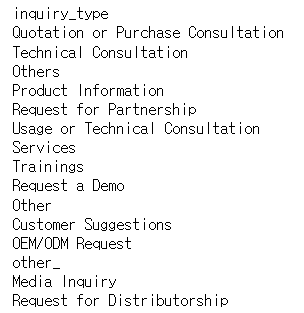

In [101]:
df_train['inquiry_type'].value_counts(dropna = False)[:10]

inquiry_type
Quotation or purchase consultation    23274
Quotation or Purchase Consultation    18766
Sales Inquiry                          9977
Product Information                    1237
NaN                                     941
Other                                   929
Usage or technical consultation         668
Trainings                               434
Technical Consultation                  429
Services                                415
Name: count, dtype: int64

In [102]:
# 동의어 사전
synonyms = {
    'Quotation or purchase consultation': ['Quotation or purchase consultation', 'Quotation or Purchase Consultation',
                                           'quotation_or_purchase_consultation', 'Request for quotation or purchase',
                                           'Purchase or Quotation', 'first Info and pricing', 'quotation_', 'Sales Inquiry', 'Sales inquiry', 'Purchase'],
    'Technical Consultation': ['Usage or technical consultation', 'technical', 'Technical Support',
                                'usage or technical consultation', 'technical_consultation',
                                'Request for technical consulting', 'usage_or_technical_consultation'],
    'Others': ['Other', 'Others', 'other', 'Etc.', 'Not specified', 'etc.', 'Other_', 'other_', 'ETC.'],
    'Product Information': ['Product Information', 'display product'],
    'Request for Partnership': ['Request for Partnership'],
    'Usage or Technical Consultation': ['Usage or technical consultation', 'usage_or_technical_consultation',
                                         'Toi muon tim hieu thong tin ky thuat, gia ca cua sp de su dung',
                                         'tôi cần tham khảo giá và giải pháp từ LG',
                                         'Vui lòng báo giá giúp mình sản phẩm đo thân nhiệt Xin cảm ơn',
                                         'Preciso de um monitor médico para radiografia convencional e tomogrtafia.'],
    'Services': ['Services'],
    'Trainings': ['Trainings'],
    'Request a Demo': ['Request a Demo'],
    'Customer Suggestions': ['Customer Suggestions'],
    'OEM/ODM Request': ['OEM/ODM Request'],
    'Media Inquiry': ['Media Inquiry'],
    'Request for Distributorship': ['Request for Distributorship']
}


In [103]:
# 동의어 처리 함수
def handle_synonyms(value):
    if pd.isna(value):
        return 'Others'  # NaN 값은 그대로 반환
    for key, synonym_list in synonyms.items():
        if value.strip() in synonym_list:
            return key
    return 'Others'  # 동의어 사전에 없는 값은 0으로 처리

# 'expected_timeline' 열의 값에 대해 동의어 처리
df_train['inquiry_type'] = df_train['inquiry_type'].apply(handle_synonyms)
df_test['inquiry_type'] = df_test['inquiry_type'].apply(handle_synonyms)

# 결과 출력
print(df_train['inquiry_type'].value_counts(dropna=False))
print()
print(df_test['inquiry_type'].value_counts(dropna=False))

inquiry_type
Quotation or purchase consultation    52363
Others                                 3270
Product Information                    1238
Technical Consultation                  997
Trainings                               434
Services                                415
Request for Partnership                 297
Request a Demo                          184
Request for Distributorship              75
Customer Suggestions                     12
Usage or Technical Consultation           7
OEM/ODM Request                           5
Media Inquiry                             2
Name: count, dtype: int64

inquiry_type
Quotation or purchase consultation    3465
Others                                1601
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Request a Demo                           9
Customer Suggestions                     4
OEM/ODM Request                

### Customer_type
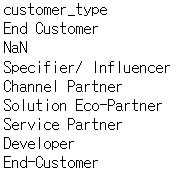

In [104]:
df_test['customer_type'].value_counts(dropna=False)

customer_type
End Customer             2453
NaN                      1457
Specifier/ Influencer     788
Channel Partner           327
Solution Eco-Partner      146
Service Partner            98
Developer                   1
End-Customer                1
Name: count, dtype: int64

In [105]:
df_train['customer_type'].value_counts(dropna=False)

customer_type
NaN                             43961
End-Customer                     6647
End Customer                     3996
Specifier/ Influencer            2525
Channel Partner                  1368
Service Partner                   349
Solution Eco-Partner              146
Installer/Contractor               52
Specifier / Influencer             43
Corporate                          31
HVAC Engineer                      23
Engineer                           20
Developer                          17
Technician                         16
Consultant                         15
Other                              10
Home Owner                         10
End-user                            8
Manager / Director                  8
Software/Solution Provider          7
Etc.                                6
Architect/Consultant                5
Homeowner                           5
Reseller                            5
Installer                           5
Interior Designer                   

In [106]:
df_train['customer_type'].unique()

array(['End-Customer', 'Specifier/ Influencer', 'Service Partner',
       'Channel Partner', nan, 'Corporate', 'End Customer',
       'Specifier / Influencer', 'Solution Eco-Partner', 'Distributor',
       'Other', 'System Integrator', 'Consultant', 'Installer',
       'Homeowner', 'Others', 'Technician', 'Installer/Contractor',
       'Engineer', 'Manager / Director', 'Developer', 'Etc.',
       'Architect/Consultant', 'End-user', 'HVAC Engineer', 'Reseller',
       'Software/Solution Provider', 'Software / Solution Provider',
       'Dealer/Distributor', 'Technical Assistant', 'Commercial end-user',
       'Interior Designer', 'Home Owner', 'Administrator'], dtype=object)

In [107]:
synonyms = {
    "End Customer": ["End Customer",'End-Customer', "Homeowner", "End-user", "end-user", "Commercial end-user", "Home Owner"],
    "Specifier/Influencer": ["Specifier/ Influencer",'Specifier / Influencer', "Consultant", "Architect/Consultant", "Interior Designer"],
    "Channel Partner": ["Channel Partner", "Distributor", "Reseller", "Dealer/Distributor"],
    "Solution Eco-Partner": ["Solution Eco-Partner", "System Integrator", "Software/Solution Provider", "Software / Solution Provider"],
    "Service Partner": ["Service Partner", "Installer", "Installer/Contractor", "Technician", "Technical Assistant"],
    "Developer": ["Developer", "Engineer", "HVAC Engineer"],
    "Others": ["Others", "Corporate", "Other", "Etc.", "Manager / Director", "Administrator"]
}

In [108]:
# 동의어 처리 함수
def handle_synonyms(value):
    if pd.isna(value):
        return 'Others'  # NaN 값은 그대로 반환
    for key, synonym_list in synonyms.items():
        if value.strip() in synonym_list:
            return key
    return 'Others'  # 동의어 사전에 없는 값은 0으로 처리

# 'expected_timeline' 열의 값에 대해 동의어 처리
df_train['customer_type'] = df_train['customer_type'].apply(handle_synonyms)
df_test['customer_type'] = df_test['customer_type'].apply(handle_synonyms)

# 결과 출력
print(df_train['customer_type'].value_counts(dropna=False))
print()
print(df_test['customer_type'].value_counts(dropna=False))

customer_type
Others                  44021
End Customer            10667
Specifier/Influencer     2593
Channel Partner          1379
Service Partner           423
Solution Eco-Partner      156
Developer                  60
Name: count, dtype: int64

customer_type
End Customer            2454
Others                  1457
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Developer                  1
Name: count, dtype: int64


### customer_position
- none을 결측치로 처리
- 카테고리 범주화 필요

In [109]:
print(df_train['customer_position'].value_counts(dropna=False))
print()
print(df_test['customer_position'].value_counts(dropna=False))

customer_position
none                      19680
manager                    8217
ceo/founder                7984
other                      6499
director                   4843
                          ...  
chairman                      1
pgt physics                   1
education professional        1
chemistry teacher             1
radiology professional        1
Name: count, Length: 117, dtype: int64

customer_position
none                                                                                      1957
manager                                                                                    726
others                                                                                     639
ceo/founder                                                                                593
director                                                                                   343
associate/analyst                                                                          279
en

In [110]:
for i in range(len(df_train['customer_position'])):
               if df_train['customer_position'][i] == "none": 
                   df_train['customer_position'][i] = np.nan
                
                
for i in range(len(df_test['customer_position'])):
               if df_test['customer_position'][i] == "none": 
                   df_test['customer_position'][i] = np.nan

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/tmp/ipykernel_165/1947003521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['customer_position'][i] = np.nan
/tmp/ipykernel_165/1947003521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['customer_position'][i] = np.nan
/tmp/ipykernel_165/1947003521.py:3: SettingWithCop

In [111]:
print(df_train['customer_position'].value_counts(dropna=False)[:20])
print()
print(df_test['customer_position'].value_counts(dropna=False))

customer_position
NaN                            19680
manager                         8217
ceo/founder                     7984
other                           6499
director                        4843
associate/analyst               2597
partner                         2536
entry level                     2216
others                           964
c-level executive                851
trainee                          849
vice president                   509
intern                           446
end-user                         424
hospital                         201
installer                         60
government                        29
cargo                             27
software /solution provider       25
manufacturer                      23
Name: count, dtype: int64

customer_position
NaN                                                                                       1957
manager                                                                                    726
others 

In [112]:
df_train['customer_position'].unique()#.isna().sum()# .value_counts(dropna=False)

array(['entry level', 'ceo/founder', 'partner', 'manager',
       'vice president', 'associate/analyst', 'c-level executive', nan,
       'director', 'other', 'intern', 'trainee', 'others',
       'this is a consume display requirement for home purpose.',
       'vicepresident', 'consulting', 'entrylevel', 'c-levelexecutive',
       'unpaid', 'physics teacher', 'assistant professor',
       'av management', 'maths lecturer', 'founder', 'engineering',
       'installer', 'homeowner', 'consultant', 'commercial end-user',
       'employee', 'bulgaria', 'lider de desarrollo', 'administrative',
       'entrepreneurship', 'decision-influencer', 'decision maker',
       'customer', 'not applicable', 'decision-maker', 'no influence',
       'commercial consultant', 'science teacher', 'decision influencer',
       'technical', 'architecture/consult', 'architect/consultant',
       'exhibition', 'hospital', 'end-user', 'government', 'manufacturer',
       'software /solution provider', 'system i

In [113]:
synonyms = {
    'manager': ['manager'],
    'Others': ['other', 'others', 'no influence', 'not applicable', 'this is a consume display requirement for home purpose.', 
               'other - please specify - cedia association', 'entrepreneurship', 'cargo', 'career coach', 'leadership/executive office/owner', 
               'market intelligence/research', 'genel müdür', 'mindenes', 'proprietário(a)', 'the big boss'],
    'ceo/founder': ['ceo/founder', 'founder', 'chief executive officer', 'ceo/fundador'],
    'director': ['director', 'vp', 'business unit director', 'principal & director', 'director cum faculty at gaining apex coaching centre'],
    'associate/analyst': ['associate/analyst', 'associate/analyst', 'decision-influencer', 'decision influencer', 'decision maker', 
                          'decision-maker', 'quantitative aptitude faculty', 'academic specialist', 'physics faculty', 'science teacher', 
                          'maths lecturer', 'science teacher', 'teacher/middle school coordinator', 'professor', 'assistant professor', 
                          'prof.', 'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)', 'senior lecturer', 
                          'asst prof.', 'associate professor', 'professor of mathematics', 'physics and mathematics teacher', 'english trainer for ielts,toefl,pte,gre,sat exams.', 
                          'chemistry teacher', 'neet/ olympiad expert faculty', 'associate professor in electronics engg'],
    'entry level': ['entry level', 'entrylevel'],
    'partner': ['partner', 'business partner'],
    'c-level executive': ['c-level executive', 'c-levelexecutive'],
    'intern': ['intern', 'trainee'],
    'vice president': ['vice president', 'vicepresident'],
    'trainee': ['trainee'],
    'educator': ['educator', 'education professional'],
    
}


In [114]:
# 동의어 처리 함수
def handle_synonyms(value):
    if pd.isna(value):
        return 'Others'  # NaN 값은 그대로 반환
    for key, synonym_list in synonyms.items():
        if value.strip() in synonym_list:
            return key
    return 'Others'  # 동의어 사전에 없는 값은 0으로 처리

# 'expected_timeline' 열의 값에 대해 동의어 처리
df_train['customer_position'] = df_train['customer_position'].apply(handle_synonyms)
df_test['customer_position'] = df_test['customer_position'].apply(handle_synonyms)

# 결과 출력
print(df_train['customer_position'].value_counts(dropna=False))
print()
print(df_test['customer_position'].value_counts(dropna=False))

customer_position
Others               28157
manager               8217
ceo/founder           7989
director              4848
associate/analyst     2656
partner               2538
entry level           2219
intern                1295
c-level executive      857
vice president         520
educator                 3
Name: count, dtype: int64

customer_position
Others               2626
manager               726
ceo/founder           593
director              344
associate/analyst     283
entry level           225
partner               224
intern                109
c-level executive      85
vice president         54
educator                2
Name: count, dtype: int64


### product_category

In [115]:
print(df_train['product_category'].value_counts(dropna=False))
print()
print(df_test['product_category'].value_counts(dropna=False))

product_category
NaN                                           19374
interactive digital board                      6154
vrf                                            5640
multi-split                                    3674
video wall signage                             2029
                                              ...  
system ac                                         1
sac                                               1
gscd046                                           1
43uh5f-h.awzm                                     1
monior/monitor tv,refrigerator,audio/video        1
Name: count, Length: 358, dtype: int64

product_category
NaN                          1858
vrf                           726
multi-split                   544
interactive signage           400
led signage                   289
etc.                          202
single-split                  179
video wall signage            167
hotel tv                      134
standard signage              118
oled signage  

In [116]:
synonyms = {
    'LED Signage': ['led signage', 'led 顯示屏', '互動式顯示屏', 'led aio 136', 'led 70m2', 'led cinema', 'lg led bloc', 'ledallin', 'led'],
    'Video Wall Signage': ['video wall signage', 'video wall', 'videowall signage', 'videowall_rmk', 'video wall + aio'],
    'High Brightness Signage': ['high brightness signage', '高亮度顯示屏'],
    'Standard Signage': ['standard signage', '標準顯示屏', 'signage', '特別顯示屏'],
    'OLED Signage': ['oled signage', 'oled 顯示屏', 'transparent oled'],
    'Interactive Signage': ['interactive signage', '互動式顯示屏', 'interactive digital board'],
    'Hotel TV': ['hotel tv', '酒店電視', '醫院電視', 'hospitality', 'hoteleria_us670h'],
    'Special Signage': ['special signage'],
    'vrf' : ['vrf'],
    'multi-split' : ['multi-split'],
    'single-split': ['single-split'],
    'chiller' : ['chiller'], 
    'medical display' : ['medical display'],
    'one:quick series' : ['one:quick series', 'lg one:quick series'],
    'monitor' : ['monitor']
}

In [117]:
# 동의어 처리 함수
def handle_synonyms(value):
    if pd.isna(value):
        return 'Others'  # NaN 값은 그대로 반환
    for key, synonym_list in synonyms.items():
        if value.strip() in synonym_list:
            return key
    return 'Others'  # 동의어 사전에 없는 값은 0으로 처리

# 'expected_timeline' 열의 값에 대해 동의어 처리
df_train['product_category'] = df_train['product_category'].apply(handle_synonyms)
df_test['product_category'] = df_test['product_category'].apply(handle_synonyms)

# 결과 출력
print(df_train['product_category'].value_counts(dropna=False))
print()
print(df_test['product_category'].value_counts(dropna=False))

product_category
Others                     27978
Interactive Signage         8016
vrf                         5640
multi-split                 3674
Video Wall Signage          2146
LED Signage                 1929
single-split                1569
one:quick series            1436
OLED Signage                1358
Hotel TV                    1118
chiller                     1051
Standard Signage            1010
medical display              962
monitor                      762
High Brightness Signage      478
Special Signage              172
Name: count, dtype: int64

product_category
Others                     2276
vrf                         726
multi-split                 544
Interactive Signage         474
LED Signage                 289
single-split                179
Video Wall Signage          167
Hotel TV                    134
Standard Signage            118
OLED Signage                104
chiller                      99
monitor                      58
High Brightness Signage    

### business_area
- 13개의 category로 이루어져 있음
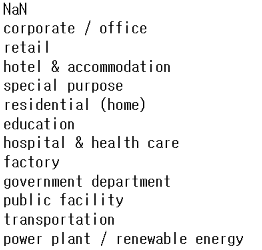
- NaN은 Others로 대체

In [118]:
print(df_train['business_area'].value_counts(dropna=False))
print()
print(df_test['business_area'].value_counts(dropna=False))

business_area
NaN                               40882
corporate / office                 4097
retail                             3011
hotel & accommodation              2013
special purpose                    1929
residential (home)                 1818
education                          1727
hospital & health care             1199
factory                            1035
government department               650
public facility                     519
transportation                      306
power plant / renewable energy      113
Name: count, dtype: int64

business_area
NaN                               2898
corporate / office                 581
transportation                     431
retail                             318
education                          312
hotel & accommodation              177
hospital & health care             133
residential (home)                 124
special purpose                     93
factory                             77
public facility                    

In [119]:
# 결측치 Others로 채우기
df_train['business_area'] = df_train['business_area'].fillna('Others')
df_test['business_area'] = df_test['business_area'].fillna('Others')

In [120]:
print(df_train['business_area'].value_counts(dropna=False))
print()
print(df_test['business_area'].value_counts(dropna=False))

business_area
Others                            40882
corporate / office                 4097
retail                             3011
hotel & accommodation              2013
special purpose                    1929
residential (home)                 1818
education                          1727
hospital & health care             1199
factory                            1035
government department               650
public facility                     519
transportation                      306
power plant / renewable energy      113
Name: count, dtype: int64

business_area
Others                            2898
corporate / office                 581
transportation                     431
retail                             318
education                          312
hotel & accommodation              177
hospital & health care             133
residential (home)                 124
special purpose                     93
factory                             77
public facility                    

### customer_job

In [121]:
print(df_train['customer_job'].value_counts(dropna=False))
print()
print(df_test['customer_job'].value_counts(dropna=False))

customer_job
NaN                               18733
engineering                        6342
other                              4852
administrative                     3359
education                          2287
                                  ...  
appliance specialist                  1
av estimator                          1
purchasers                            1
pricing                               1
exhibition / convention center        1
Name: count, Length: 561, dtype: int64

customer_job
NaN                          1439
engineering                   728
others                        482
education                     408
administrative                307
                             ... 
pathologist                     1
surgery professional            1
k12 school                      1
media and communications        1
medical solution provider       1
Name: count, Length: 42, dtype: int64


In [122]:
df_train['customer_job'].value_counts(dropna=False)[40:50]

customer_job
curation                42
quality assurance       39
art and design          28
general management      27
buyer                   19
sonstiges               19
technical               18
director                17
arquitecto/consultor    16
kreation_und_design     16
Name: count, dtype: int64

In [123]:
synonyms = {
    'consulting': ['Consulting', 'consulting'],
    'information technology': ['Information Technology', 'information technology'],
    'sales': ['Sales', 'sales'],
    'engineering': ['Engineering', 'engineering', 'technical'],
    'marketing': ['Marketing', 'marketing'],
    'purchasing': ['Purchasing', 'purchasing'],
    'others': ['Others', 'other', 'others'],
    'operations': ['Operations', 'operations'],
    'support': ['Support', 'support'],
    'finance': ['Finance', 'finance'],
    'business development': ['Business Development', 'business development'],
    'administrative': ['Administrative', 'administrative'],
    'education': ['Education', 'K12 School', 'education'],
    'product management': ['Product Management', 'product management'],
    'program and project management': ['Program and Project Management', 'program and project management'],
    'entrepreneurship': ['Entrepreneurship', 'entrepreneurship'],
    'community and social services': ['Community and Social Services', 'community and social services'],
    'media and communication': ['Media and Communication', 'media and communications'],
    'arts and design': ['Arts and Design', 'arts and design', 'graphic/color art'],
    'Medical': ['Healthcare Services', 'healthcare services', 'Medical Imaging Specialist', 'medical imaging specialist', 'clinical specialist', 'Clinical Specialist', 'radiology professional', 'Radiology Professional', 'healthcare', 'Healthcare', 'surgery professional', 'Surgery Professional', 'medical solution provider', 'Medical Solution Provider'],
    'accounting': ['Accounting', 'accounting'],
    'curation': ['Curation', 'curation'],
    '3d/vfx art': ['3D/VFX Art', '3d/vfx art'],
    'legal': ['Legal', 'legal'],
    'military and protective services': ['Military and Protective Services', 'military and protective services'],
    'real estate': ['Real Estate', 'real estate'],
    'human resources': ['Human Resources', 'human resources'],
    'electronics & telco': ['Electronics & Telco'],
    'quality assurance': ['Quality Assurance'],
    'pathologist': ['Pathologist', 'pathologist'],
    'research': ['Research', 'research'],
    'film production': ['Film Production', 'film production']
}



In [124]:
def handle_synonyms(value):
    if pd.isna(value):
        return 'Others'  # NaN 값은 그대로 반환
    for key, synonym_list in synonyms.items():
        if value.strip() in synonym_list:
            return key
    return 'Others'  # 동의어 사전에 없는 값은 0으로 처리

# 'expected_timeline' 열의 값에 대해 동의어 처리
df_train['customer_job'] = df_train['customer_job'].apply(handle_synonyms)
df_test['customer_job'] = df_test['customer_job'].apply(handle_synonyms)

# 결과 출력
print(df_train['customer_job'].value_counts(dropna=False))
print()
print(df_test['customer_job'].value_counts(dropna=False))

customer_job
Others                              20762
engineering                          6360
others                               5615
administrative                       3359
education                            2287
sales                                2218
operations                           1961
purchasing                           1938
information technology               1937
business development                 1801
arts and design                      1607
Medical                              1530
consulting                           1349
entrepreneurship                     1192
marketing                            1161
program and project management        948
product management                    573
finance                               463
accounting                            396
support                               358
real estate                           295
film production                       241
3d/vfx art                            235
legal                

### 레이블 인코딩

In [125]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [126]:
# 레이블 인코딩할 칼럼들
label_columns = [
    #"customer_country",
    #"business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    #"product_subcategory",
    #"product_modelname",
    #"customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [127]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [128]:
# ! pip install imbalanced-learn

In [129]:
from imblearn.under_sampling import RandomUnderSampler

# Random Undersampling 적용
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(df_train.drop("is_converted", axis=1),df_train["is_converted"])

In [130]:
x_train, x_val, y_train, y_val = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

## feature selection

In [131]:
len(x_train.columns)

20

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from lightgbm import LGBMClassifier

kf = StratifiedKFold(shuffle = True, random_state = True)
model = LGBMClassifier(random_state = 42,
                      colsample_bytree = 0.8,
                      learning_rate = 0.1,
                      n_estimators = 300,
                      num_leaves = 31,
                      subsample=0.8
                      )
selector = SFS(model, k_features=(3, 20), forward=True, floating=True, scoring = 'f1', cv = kf)

selector = selector.fit(x_train,y_train)

selector.subsets_

In [132]:
sfs_selected =[
    'bant_submit',
   'com_reg_ver_win_rate',
   'customer_idx',
   'customer_type',
   'historical_existing_cnt',
   'customer_job',
   'lead_desc_length',
   'inquiry_type',
   'product_category',
   'response_corporate',
   'expected_timeline',
   'ver_cus',
   'ver_pro',
   'ver_win_ratio_per_bu',
   'business_area',
   'lead_owner'
]

In [133]:
list(set(cols)-set(sfs_selected))

['customer_position',
 'business_unit',
 'enterprise',
 'ver_win_rate_x',
 'is_converted']

### 모델 정의 

In [134]:
# model = DecisionTreeClassifier() # undersampling-> 0.53 : 0.85

from sklearn.ensemble import RandomForestClassifier # 0.63 : 0.91
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# model = RandomForestClassifier(random_state = 42)
# model = LGBMClassifier(random_state = 42)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

param_grid = {
    'num_leaves': [15, 31, 50],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.8, 0.9, 1.0]
}


kf = StratifiedKFold(shuffle = True, random_state = 42)
search = GridSearchCV(estimator=model, param_grid =param_grid,
                                    cv=kf, scoring='f1')

search.fit(x_train.fillna(0), y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", search.best_params_)

# 최적의 모델 출력
best_model = search.best_estimator_
best_model

### 모델 학습

In [135]:
model = LGBMClassifier(random_state = 42,
                      colsample_bytree = 0.8,
                      learning_rate = 0.1,
                      n_estimators = 300,
                      num_leaves = 31,
                      subsample=0.8
                      )
model.fit(x_train[sfs_selected].fillna(0), y_train)

[LightGBM] [Info] Number of positive: 3884, number of negative: 3876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 7760, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500515 -> initscore=0.002062
[LightGBM] [Info] Start training from score 0.002062


LGBMClassifier(colsample_bytree=0.8, n_estimators=300, random_state=42,
               subsample=0.8)

model = best_model 
model.fit(x_train.fillna(0), y_train)

### 모델 성능 보기

In [136]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [137]:
pred = model.predict(x_val[sfs_selected].fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[910  56]
 [ 68 906]]

정확도: 0.9361
정밀도: 0.9305
재현율: 0.9420
F1: 0.9362


## feature importance 확인

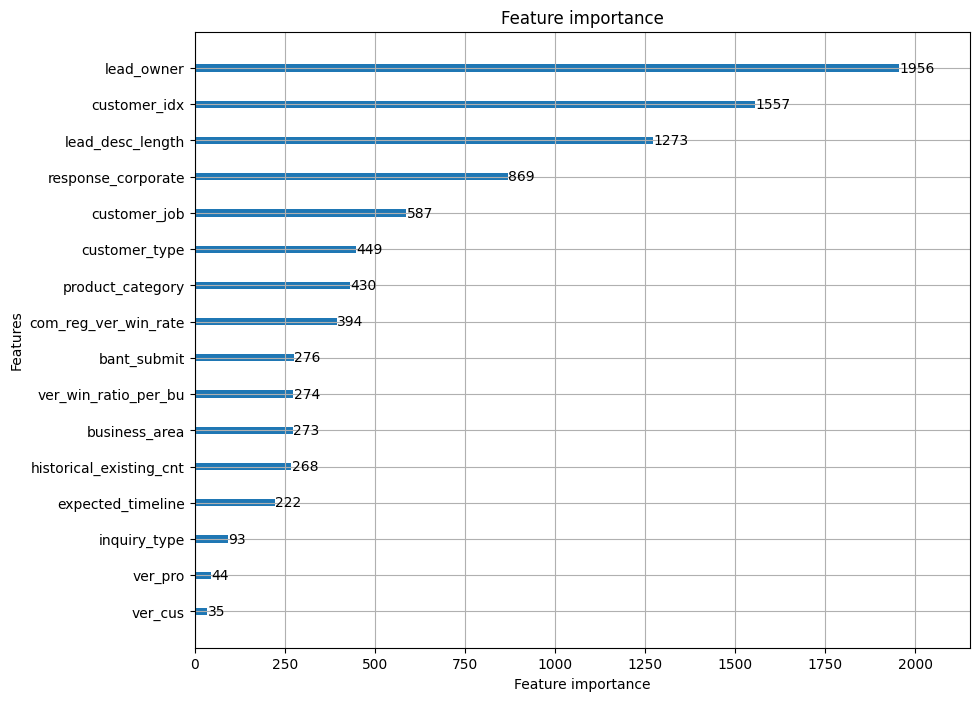

In [138]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

# 특성 중요도 시각화
plot_importance(model, figsize=(10, 8))
plt.show()

스케일링 전 plot_importance(model)
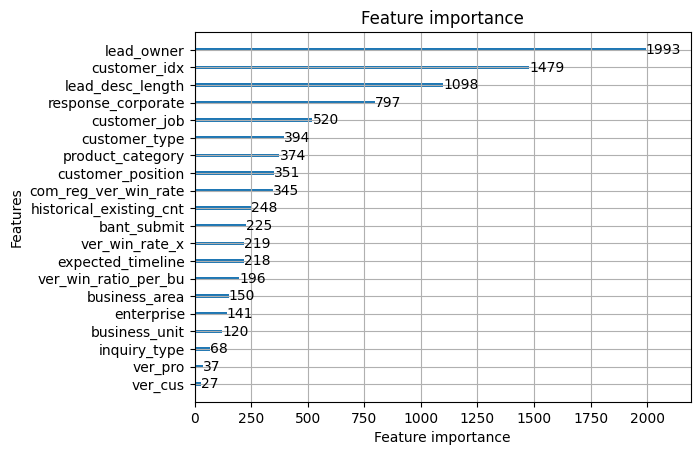

## 4. 제출하기

### 테스트 데이터 예측

In [139]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [140]:
test_pred = model.predict(x_test[sfs_selected].fillna(0))
sum(test_pred) # True로 예측된 개수

1944

### 제출 파일 작성

In [141]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_240225_B.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**

In [142]:
sfs_selected =[
    'bant_submit',
   'com_reg_ver_win_rate',
   'customer_idx',
   'customer_type',
   'historical_existing_cnt',
   'customer_job',
   'lead_desc_length',
   'inquiry_type',
   'product_category',
   'response_corporate',
   'expected_timeline',
   'ver_cus',
   'ver_pro',
   'ver_win_ratio_per_bu',
   'business_area',
   'lead_owner'
]
len(sfs_selected)

16